In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('netflix_titles.csv')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


Cleaning The Data

In [ ]:
df = df.dropna(subset=['rating', 'cast'])
df = df.fillna(method='ffill')
df = df.drop_duplicates()
df = df.reset_index(drop=True)


In [ ]:
df['year_added'] = pd.to_datetime(df['date_added'],errors = 'coerce').dt.year
df['main_genre']= df['listed_in'].str.split(',').str[0]

### 📈 Analysis: How Has Netflix Grown Over the Years?

In this section, we analyze the number of titles Netflix has added each year. This helps us understand how the platform has evolved in terms of content volume.

We group the data by the `year_added` column and compare the number of **Movies** and **TV Shows** released each year.

This trend gives us insight into whether Netflix has focused more on original movies or series, and how that focus has changed over time.

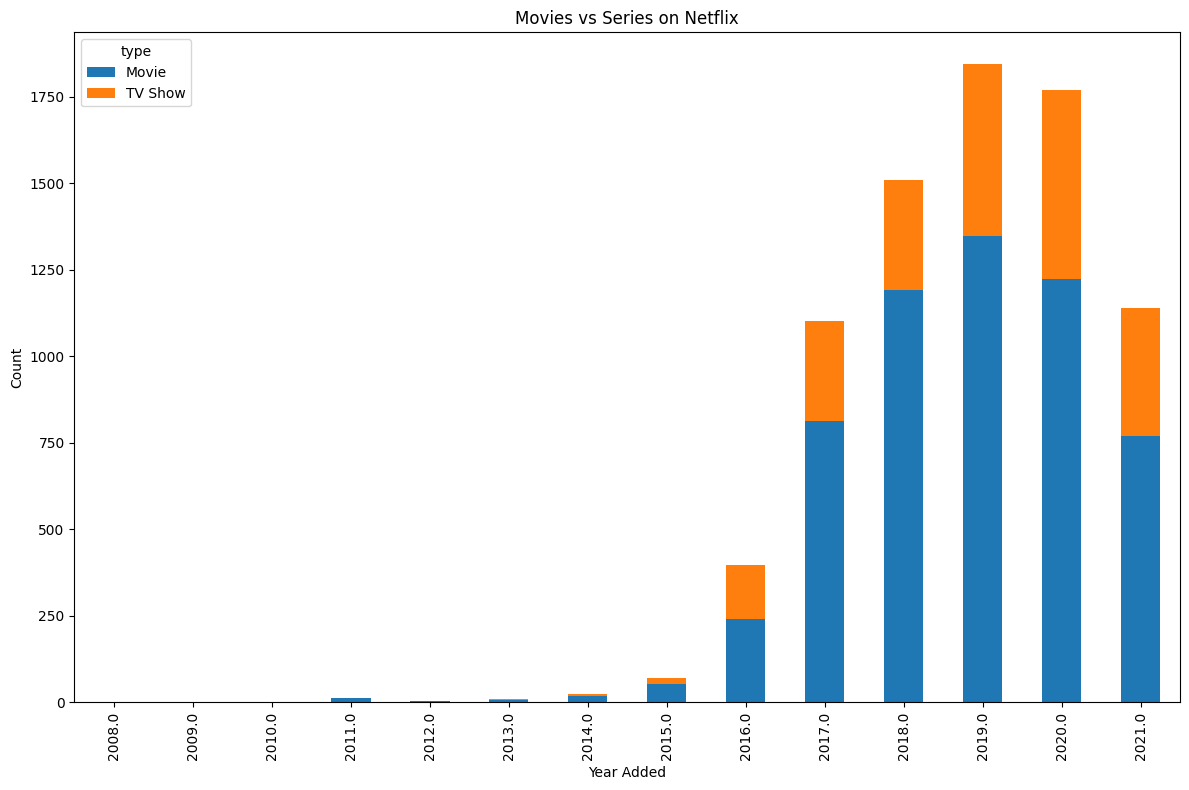

In [ ]:
yearly_type_count = df.groupby(['year_added','type']).size().unstack()
yearly_type_count.plot(kind= 'bar',stacked = True,figsize=(12,8))
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.title('Movies vs Series on Netflix')
plt.tight_layout()
plt.savefig('Movies vs Series on Netflix')
plt.show()

### 📈 Analysis: Netflix’s Expansion from 2011 to 2021

From 2011 to 2021, Netflix expanded its content library dramatically. The number of titles added each year surged after 2016, peaking in 2019. While Movies consistently outnumbered TV Shows, the gap narrowed during the peak years.

Interestingly, the number of new titles declined in 2020 and 2021, possibly due to global production slowdowns during the COVID-19 pandemic.

This trend highlights Netflix’s rapid scaling phase and hints at shifts in content acquisition strategy.


### 🎬 Analysis: How Are Movies and TV Shows Rated on Netflix?

We analyzed the maturity ratings of Movies and TV Shows to understand their target audience. The majority of Netflix Movies are rated TV-MA or TV-14, suggesting a strong focus on mature storytelling.

TV Shows, while also centered on TV-MA and TV-14, have a more even spread into younger-friendly categories like TV-PG and TV-Y7. This indicates that series on Netflix cater to a slightly more diverse age demographic than movies.


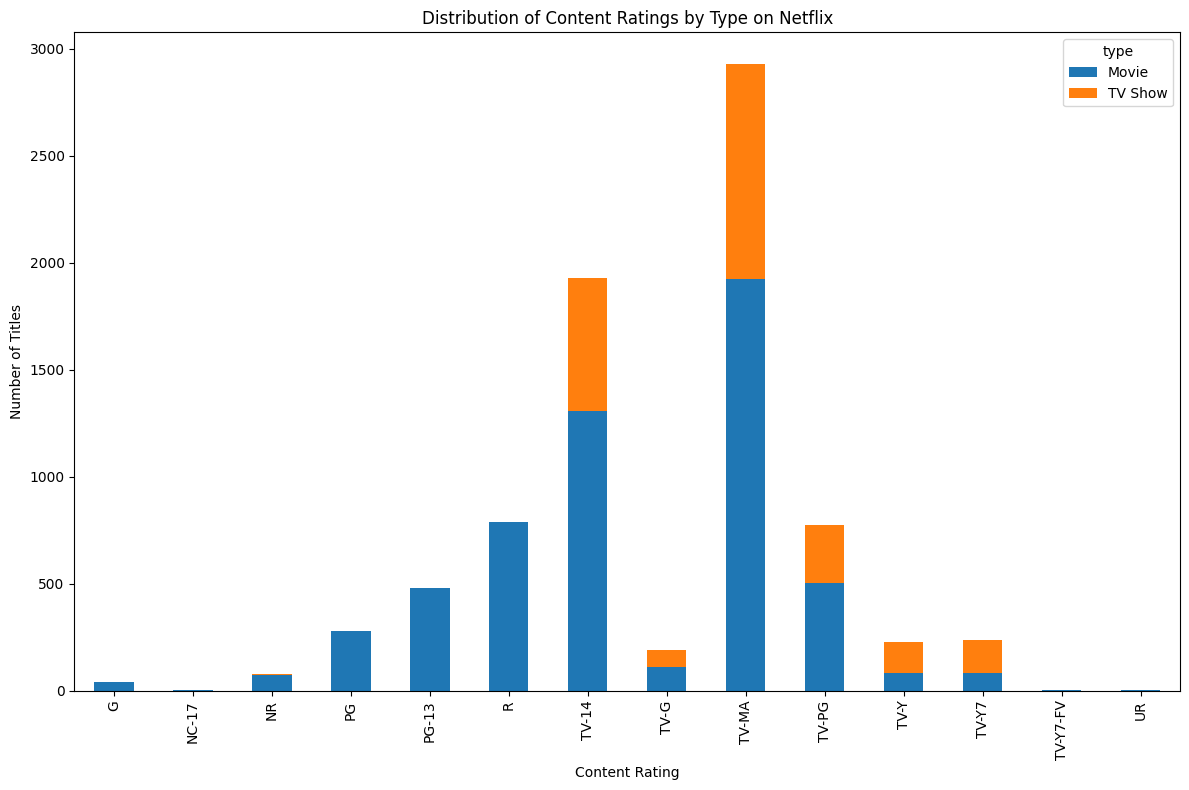

In [ ]:
rating_type_count = df.groupby(['rating','type']).size().unstack()
rating_type_count.plot(kind= 'bar',stacked = True,figsize=(12,8))
plt.title('Distribution of Content Ratings by Type on Netflix')
plt.xlabel('Content Rating')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.savefig('Distribution of Content Ratings by Type on Netflix')
plt.show()

Netflix leans heavily toward mature content, with the majority of both Movies and TV Shows rated TV-MA and TV-14.
TV Shows are more balanced across age-friendly ratings, while Movies skew toward adult audiences.
This suggests that Netflix sees its Movie audience as more adult-driven, whereas TV Shows serve a broader range.

### 🎬 Are Netflix Movies Getting Shorter Over Time?

We looked at how long movies are on average when added to Netflix each year. By cleaning the runtime data and grouping by year, we found the average movie length over time.

This helps us understand if Netflix is shifting toward shorter, quicker content or sticking with longer, traditional formats.


In [ ]:
movies_df = df[df['type']=='Movie'].copy()
runtime_minutes= movies_df['duration'].str.split('min').str[0].astype(int)
movies_df['runtime_minutes']=runtime_minutes

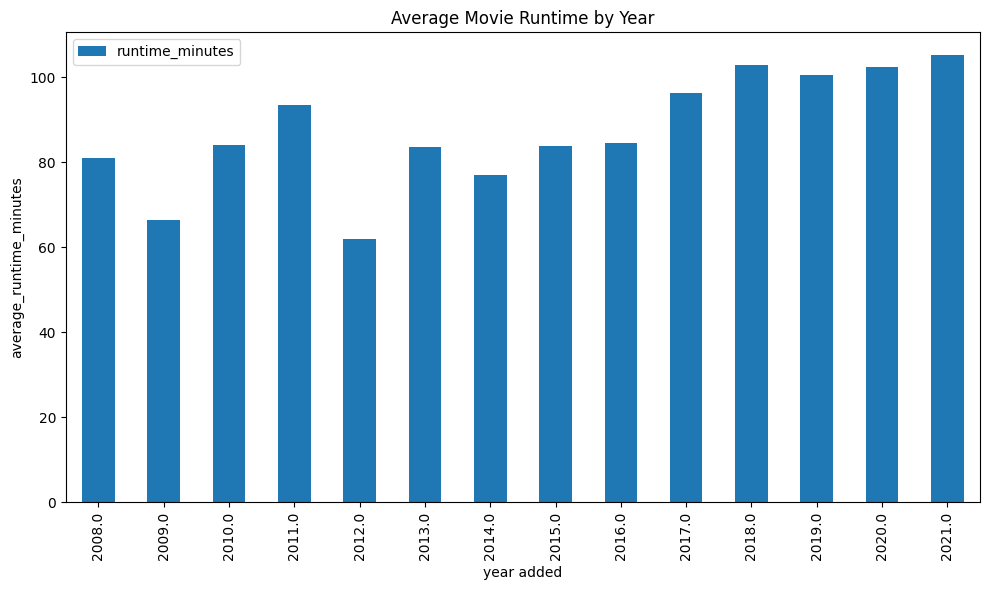

In [ ]:
avg_yearly_runtime=movies_df.groupby('year_added')['runtime_minutes'].mean().reset_index()
avg_yearly_runtime.plot(kind='bar',x='year_added',y='runtime_minutes',figsize= (10,6))
plt.xlabel('year added')
plt.ylabel('average_runtime_minutes')
plt.title('Average Movie Runtime by Year')
plt.tight_layout()
plt.savefig('Average Runtime per year')
plt.show()

### 📊 Average Movie Runtime on Netflix Over the Years

From the bar chart, we observe that the average runtime of Netflix movies has gradually increased over the years. While earlier years (2008–2013) had shorter films averaging around 70–90 minutes, recent years (2017–2021) show a rise to over 100 minutes.

This suggests Netflix may be investing more in full-length, cinematic movies in recent years, possibly reflecting changing audience preferences or a shift in content strategy.
